In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,GlobalAveragePooling2D,RandomRotation,RandomZoom,RandomFlip,Input

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

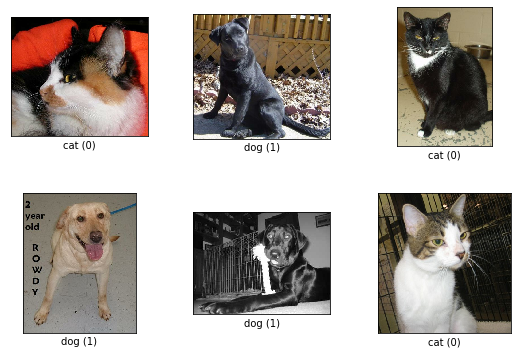

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='C:\\Users\\admin\\tensorflow_datasets\\cats_vs_dogs\\4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell

In [4]:
#ds = tfds.load('cats_vs_dogs', split='train', shuffle_files=True)
#assert isinstance(ds, tf.data.Dataset)
#print(ds)

(ds_train,ds_test),ds_info = tfds.load(
    "cats_vs_dogs",
split=['train[:80%]','train[80%:]'],
shuffle_files=True,
as_supervised=True,#returns tuple(img,label)
    with_info=True,
)
fig=tfds.show_examples(ds_train,ds_info,rows=2,cols=3)
print(ds_info)


In [4]:
def normalize_data(image,label):
    image = tf.image.resize(image, (256, 256))
    return tf.cast(image,tf.float32)/255,label

In [5]:
AUTOTUNE=tf.data.AUTOTUNE
ds_train = (
    ds_train
    .map(normalize_data, num_parallel_calls=AUTOTUNE)
    .shuffle(1000)
    .batch(64)
    .prefetch(AUTOTUNE)
)
#autotune
#automatically and dynamically tune parameters of the input pipeline
#for optimal performance
ds_test = (
    ds_test
    .map(normalize_data, num_parallel_calls=AUTOTUNE)
    .batch(64)
    .prefetch(AUTOTUNE)
)



In [6]:
data_augmentation = Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
])


In [7]:

model=Sequential()
model.add(Input(shape=(256,256,3)))
model.add(data_augmentation)
model.add(
    Conv2D(
        filters=32,activation='relu',input_shape=(256,256,3),kernel_size=(3,3),padding='same'
    )
)

model.add(
    MaxPool2D
    (
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    )
)
model.add(
    Conv2D
          (filters=64,activation='relu',kernel_size=(3,3)
                )
         )
model.add(
    MaxPool2D
    (
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    )
)
model.add(
    Conv2D
    (
        filters=128,activation='relu',kernel_size=(3,3)
    )
)
model.add(
    MaxPool2D
    (
    pool_size=(2, 2),
    strides=2,
    padding='valid',
    )
)

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 128)      

In [9]:
model.compile(optimizer="adam", loss='binary_crossentropy',metrics= ['accuracy'])

In [10]:
model_fit=model.fit(ds_train,validation_data=ds_test,epochs=7)

Epoch 1/7


291/291 [==============================] - 1015s 3s/step - loss: 0.6452 - accuracy: 0.6321 - val_loss: 0.5691 - val_accuracy: 0.7012
Epoch 2/7
291/291 [==============================] - 1073s 4s/step - loss: 0.5511 - accuracy: 0.7176 - val_loss: 0.4948 - val_accuracy: 0.7539
Epoch 3/7
291/291 [==============================] - 1061s 4s/step - loss: 0.5028 - accuracy: 0.7541 - val_loss: 0.4673 - val_accuracy: 0.7769
Epoch 4/7
291/291 [==============================] - 1147s 4s/step - loss: 0.4708 - accuracy: 0.7754 - val_loss: 0.4404 - val_accuracy: 0.7904
Epoch 5/7
291/291 [==============================] - 1151s 4s/step - loss: 0.4488 - accuracy: 0.7891 - val_loss: 0.4101 - val_accuracy: 0.8121
Epoch 6/7
291/291 [==============================] - 1604s 6s/step - loss: 0.4280 - accuracy: 0.8015 - val_loss: 0.4159 - val_accuracy: 0.8093
Epoch 7/7
291/291 [==============================] - 2102s 7s/step - loss: 0.4065 - accuracy: 0.8154 - val_loss: 0.3722 - val_accuracy: 0.8285


In [11]:
model.predict(ds_test)

73/73 [==============================] - 92s 1s/step


array([[0.06921148],
       [0.5395506 ],
       [0.53268456],
       ...,
       [0.23887797],
       [0.9378256 ],
       [0.04980295]], dtype=float32)

In [12]:
model.evaluate(ds_test)

73/73 [==============================] - 91s 1s/step - loss: 0.3722 - accuracy: 0.8285


[0.37217116355895996, 0.8284608721733093]

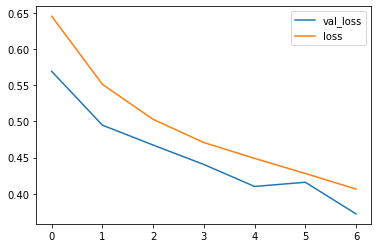

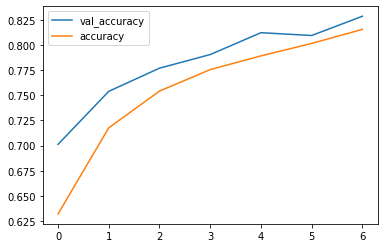

In [13]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['val_loss'],label='val_loss')
plt.plot(model_fit.history['loss'],label='loss')
plt.legend()
plt.show()

plt.plot(model_fit.history['val_accuracy'],label='val_accuracy')
plt.plot(model_fit.history['accuracy'],label='accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 87ms/step
Raw probability: 0.035413343
Output: 0 (Cat)


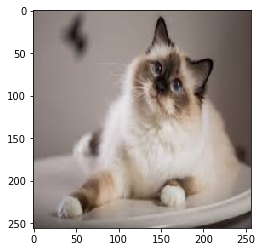

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

test_img = cv2.imread("cat.jpg")
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img, (256,256))
test_img = test_img / 255.0

plt.imshow(test_img)

img_batch = test_img.reshape(1, 256, 256, 3)
prediction = model.predict(img_batch)
pred = prediction[0][0]

print("Raw probability:", pred)

if pred >= 0.5:
    print("Output: 1 (Dog)")
else:
    print("Output: 0 (Cat)")
